In [25]:
import os
import mido
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_midis():
    ms = []

    directory = "data"
    for foldername in os.listdir(directory):
        directory = os.path.join("data", foldername)
        for filename in os.listdir(directory):
            if('V2'in filename): continue
            if os.path.isfile(os.path.join(directory, filename)):
                ms.append(os.path.join(directory, filename))
                # print(filename)
    return ms

midis = get_midis()

print(midis[:5])

['data\\albeniz\\alb_esp1.mid', 'data\\albeniz\\alb_esp2.mid', 'data\\albeniz\\alb_esp3.mid', 'data\\albeniz\\alb_esp4.mid', 'data\\albeniz\\alb_esp5.mid']


In [6]:
def createMidiFileWithAllMessages(notes, starts, velocity, fileName):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)

    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], velocity=velocity[i], time=starts[i]))
        
    file.save(fileName)

In [38]:
# works only with files with just one track
def get_all_messages_one_file(midi_file):
    file = mido.MidiFile(midi_file)
    track = file.tracks[1]
    messages = []
    for message in track:
        # print(f'\t{message.type}: {message.dict()}')
        if(message.type == 'note_on' or message.type == 'note_off'):
            # print(f'\t{message.dict()}')
            messages.append(message)
            # track.remove(message)
    
    notes = [m.note for m in messages]
    starts = [m.time for m in messages]
    vels = [m.velocity == 0 for m in messages]

    return notes, starts, vels


In [39]:
all_messages_all_files = [get_all_messages_one_file(m) for m in midis]

{'type': 'note_on', 'time': 101760, 'note': 81, 'velocity': 48, 'channel': 0} data\beeth\waldstein_3.mid
{'type': 'note_on', 'time': 155520, 'note': 81, 'velocity': 48, 'channel': 0} data\beeth\waldstein_3.mid
{'type': 'note_on', 'time': 127680, 'note': 79, 'velocity': 54, 'channel': 0} data\beeth\waldstein_3.mid
{'type': 'note_on', 'time': 122400, 'note': 70, 'velocity': 57, 'channel': 0} data\chopin\chpn_op35_2.mid
{'type': 'note_on', 'time': 129600, 'note': 70, 'velocity': 51, 'channel': 0} data\chopin\chpn_op35_2.mid


In [151]:
def get_data(messages):
    notes, starts, vels = zip(*messages)
    notes = np.concatenate(notes)
    starts = np.concatenate(starts)
    vels = np.concatenate(vels)
    return notes, starts, vels

notes, starts, vels = get_data(all_messages_all_files)

print(len(starts[starts > 100000]))

5


762498 762498 762498
107 155520 True
24 0 False
72.60804618503917 81.66691847060582 0.5
72.0 0.0 0.5


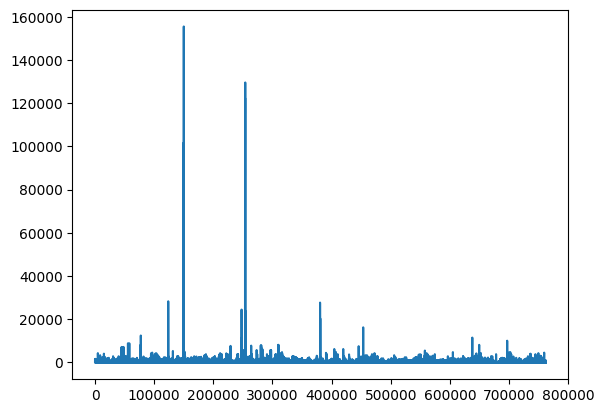

In [51]:
print(len(notes), len(starts), len(vels))
print(np.max(notes), np.max(starts), np.max(vels))
print(np.min(notes), np.min(starts), np.min(vels))
print(np.mean(notes), np.mean(starts), np.mean(vels))
print(np.median(notes), np.median(starts), np.median(vels))


plt.plot(starts)

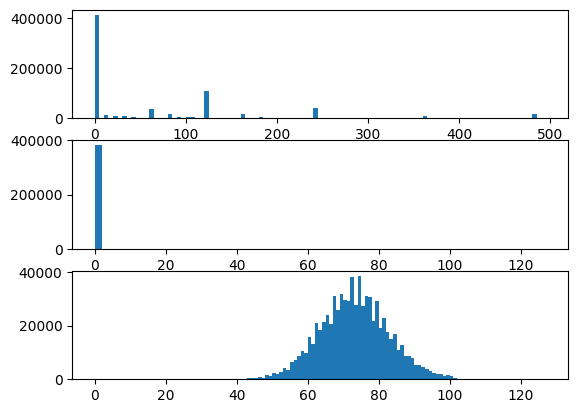

In [46]:
fig, axs = plt.subplots(3)
axs[0].hist(starts, bins=range(0,500, 5))
axs[1].hist(vels, bins=range(128))
axs[2].hist(notes, bins=range(128))


plt.show()


In [241]:
sorted_notes = np.sort(notes.copy())
sorted_starts = np.sort(starts.copy())
sorted_vels = np.sort(vels.copy())

print(sorted_notes[-10:])
print(sorted_starts[-10:])
print(sorted_vels[-10:])


[105 105 105 105 105 105 106 106 107 107]
[ 24000  24480  27720  28320  51840 101760 122400 127680 129600 155520]
[ True  True  True  True  True  True  True  True  True  True]


In [256]:
# find some statistics
def show_statistics(arr):
    unique_starts = np.unique(arr, return_counts=True)
    # print(starts_extreme)
    sorted_notes = np.argsort(unique_starts[1].copy())
    counts = unique_starts[1][sorted_notes]
    vals = unique_starts[0][sorted_notes]

    print(list(arr[:10]))
    print(list(zip(vals, counts)))

    print('taille : ', len(counts))
    print('nb apparition le plus souvent : ', np.max(counts))
    print("nb d'apparition le moins souvent : ", np.min(counts))
    print('apparait moins de 100 fois : ', len(counts[counts <= 100]))
    print('mediane des apparitions : ', np.median(counts))

## Notes

{26: 8, 27: 2, 28: 2, 29: 4, 30: 4, 31: 4, 32: 10, 33: 20, 34: 20, 35: 24, 36: 20, 37: 22, 38: 44, 39: 98, 40: 38, 41: 228, 42: 80, 43: 386, 44: 330, 45: 388, 46: 772, 47: 610, 48: 1710, 49: 1262, 50: 2216, 51: 2126, 52: 2630, 53: 4258, 54: 3474, 55: 6606, 56: 7018, 57: 8654, 58: 10562, 59: 9738, 60: 15806, 61: 13322, 62: 21076, 63: 18284, 64: 21382, 65: 23774, 66: 20464, 67: 31018, 68: 25872, 69: 31888, 70: 29428, 71: 29226, 72: 38054, 73: 27604, 74: 38580, 75: 27214, 76: 30862, 77: 30512, 78: 21570, 79: 29156, 80: 18958, 81: 23006, 82: 17736, 83: 14964, 84: 16714, 85: 10950, 86: 12928, 87: 8858, 88: 8532, 89: 7780, 90: 5232, 91: 5422, 92: 4444, 93: 3802, 94: 3078, 95: 2290, 96: 1976, 97: 2152, 98: 1388, 99: 1440, 100: 1338, 101: 634, 102: 200, 103: 162, 104: 32, 105: 16, 106: 2, 107: 2}


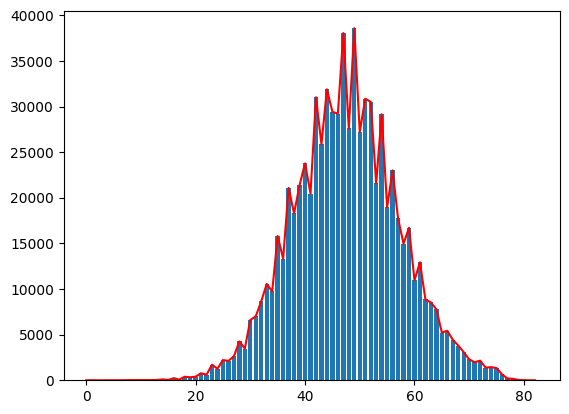

In [246]:
n = np.unique(sorted_notes, return_counts=True)

s = {n[0][i]: np.sum(sorted_notes == n[0][i]) for i in range(1, len(n[0]))}
plt.bar([a -25 for a in s.keys()], s.values())
print(s)

plt.plot(n[1], color='red')

[ 24  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42 104
 105 106 107]


In [267]:
notes, starts, vels = get_data(all_messages_all_files)
show_statistics(notes)

notes_extreme = n[0][n[1] < 100]
print('\n',notes_extreme,len(notes_extreme),'\n')

notes = notes[~np.isin(notes, notes_extreme)]
show_statistics(notes)


[81, 81, 88, 88, 86, 86, 88, 88, 86, 86]
[(24, 2), (106, 2), (28, 2), (107, 2), (27, 2), (29, 4), (30, 4), (31, 4), (26, 8), (32, 10), (105, 16), (36, 20), (33, 20), (34, 20), (37, 22), (35, 24), (104, 32), (40, 38), (38, 44), (42, 80), (39, 98), (103, 162), (102, 200), (41, 228), (44, 330), (43, 386), (45, 388), (47, 610), (101, 634), (46, 772), (49, 1262), (100, 1338), (98, 1388), (99, 1440), (48, 1710), (96, 1976), (51, 2126), (97, 2152), (50, 2216), (95, 2290), (52, 2630), (94, 3078), (54, 3474), (93, 3802), (53, 4258), (92, 4444), (90, 5232), (91, 5422), (55, 6606), (56, 7018), (89, 7780), (88, 8532), (57, 8654), (87, 8858), (59, 9738), (58, 10562), (85, 10950), (86, 12928), (61, 13322), (83, 14964), (60, 15806), (84, 16714), (82, 17736), (63, 18284), (80, 18958), (66, 20464), (62, 21076), (64, 21382), (78, 21570), (81, 23006), (65, 23774), (68, 25872), (75, 27214), (73, 27604), (79, 29156), (71, 29226), (70, 29428), (77, 30512), (76, 30862), (67, 31018), (69, 31888), (72, 38054),

## Starts


In [226]:
notes, starts, vels = get_data(all_messages_all_files)
show_statistics(starts)

[(155520, 1), (183, 1), (184, 1), (1130, 1), (3780, 1), (202, 1), (215, 1), (1125, 1), (227, 1), (3240, 1), (3116, 1), (243, 1), (247, 1), (276, 1), (285, 1), (3108, 1), (953, 1), (3050, 1), (949, 1), (324, 1), (178, 1), (325, 1), (176, 1), (1160, 1), (1395, 1), (1385, 1), (1340, 1), (1335, 1), (1310, 1), (4470, 1), (1202, 1), (1199, 1), (129, 1), (1195, 1), (131, 1), (1194, 1), (141, 1), (145, 1), (4000, 1), (154, 1), (1170, 1), (3990, 1), (164, 1), (172, 1), (948, 1), (945, 1), (933, 1), (799, 1), (548, 1), (553, 1), (558, 1), (795, 1), (582, 1), (583, 1), (590, 1), (792, 1), (638, 1), (639, 1), (658, 1), (683, 1), (693, 1), (696, 1), (707, 1), (709, 1), (711, 1), (717, 1), (525, 1), (496, 1), (487, 1), (485, 1), (351, 1), (352, 1), (2396, 1), (3003, 1), (364, 1), (367, 1), (368, 1), (384, 1), (388, 1), (4920, 1), (912, 1), (2960, 1), (868, 1), (449, 1), (845, 1), (129600, 1), (471, 1), (825, 1), (818, 1), (481, 1), (402, 1), (5040, 1), (223, 1), (7800, 1), (1924, 1), (2424, 1), (189

### Round everything


In [224]:
notes, starts, vels = get_data(all_messages_all_files)

# show_statistics(starts)

start_max = 2000
starts[starts >= start_max] = start_max

starts = np.round(starts.copy(), -2).astype(int)

show_statistics(starts)


[(1500, 3), (1600, 44), (1800, 52), (1100, 115), (1300, 135), (1700, 153), (1900, 271), (1200, 389), (900, 406), (2000, 492), (800, 766), (600, 799), (1400, 990), (300, 1770), (1000, 3509), (700, 3661), (400, 8916), (500, 19164), (200, 74759), (100, 190863), (0, 455241)]
taille :  21
max :  455241
min :  3
inférieur à 100 :  3
mediane :  766.0


In [175]:
notes, starts, vels = get_data(all_messages_all_files)

a = np.sort(np.random.randint(0, 10, 11))
print(a)
p = 20
for i in range(100//20):
    print(np.percentile(a, p*i))


[1 2 2 2 4 4 5 5 7 9 9]
1.0
2.0
4.0
5.0
7.0


## Velocities

In [247]:
notes, starts, vels = get_data(all_messages_all_files)

vels[vels > 0] = 64

## Combine everything with a single matrix